### Principle Components 

It's important to remember that the variance on a component will be influenced by the scale of the variables so we should ALWAYS standardize features before performing PCA on them.  

Steps:  
1. Standardize the d-dimensional dataset . 
2. Construct the covariance matrix . 
3. Decompose the covariance matrx into eigenvectors and eigenvalues  
4. Seelct k eigenvectors that correspond to the k largest eigenvalues, where k is the new dimensionality
5. Construct a projection matrix W from top k eigenvectors
6. Transform the d-dimensional input dataset to map onto the k-dimensional subspace



In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

/Users/andrew.moskowitz/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import numpy as np 
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n %s' % eigen_vals)

# In the event that np.linalg.eig returns funky values, use np.linalg.eigh


Eigenvalues 
 [ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


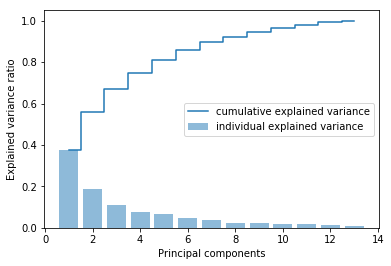

In [6]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

#### Feature Transformation

In [8]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [10]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print 'Matrix W: \n', w

Matrix W: 
[[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [11]:
#Example transformation
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

In [16]:
X_train_pca = X_train_std.dot(w)

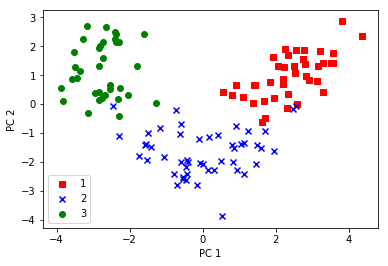

In [20]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m, in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0],
               X_train_pca[y_train==l, 1],
               c=c, label=l, marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()


## Principal Component analysis

In [24]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

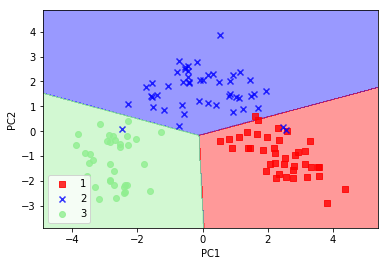

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier = lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

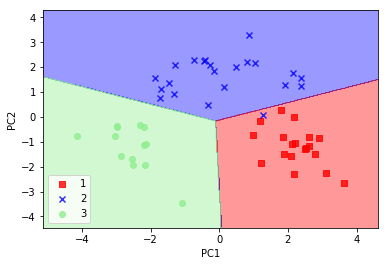

In [26]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [28]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

### Linear Discriminant Analysis

Similar to PCA except that PCA attempts to find the orthogonal component axes of maximum variance, LDA attemts to maximize class separability. Both linear tranformations for dimension reduction.  
PCA is unsupervised but LDA is supervised.  

Assumes normality and linear separability, sphericity, and independent features. Robust to assumption violation

Steps:
1. Standardize the dataset
2. For each class compute the mean vector
3. Construct the between-class scatter matrix and within-class scatter matrix
4. Compute eigenvectors and eigenvalues
5. Select k eigenvectors that correspond to the desired number of classes
6. project the samples using the subspace transformation



#### Computing the scatter matrices

In [4]:
# After getting standardized feature values
# Compute a mean feature vector 

np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(
           X_train_std[y_train==label], axis=0))
    print 'MV %s: %s\n' %(label, mean_vecs[label-1])

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [5]:
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter

print 'Within-Class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1])

Within-Class scatter matrix: 13x13


In [6]:
## Making assumption that labels are evenly distributed

print 'Class label distribution: %s' % np.bincount(y_train)[1:]

Class label distribution: [40 49 35]


In [7]:
## Should scale individual scatter matrices before we sum them to S_W
## This scaling is the same as computing the covariance matrix (scaled version of scatter matrix)

d = 13 # number of features
S_W = np.zeros((d, d))
for label,mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [8]:
## Compute the overall mean for the between-class scatter matrix

mean_overall = np.mean(X_train_std, axis=0)
d = 13 # number of features
S_B = np.zeros((d, d))
for i,mean_vec in enumerate(mean_vecs):
    n = X_train[y_train==i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    mean_overall = mean_overall.reshape(d, 1) # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


#### Selecting linear discriminants for the new feature subspace

In [9]:
## Solve the generalized eigenvalue problem of the matrix S^-1_W*S_B

eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [10]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse =True)
print 'Eigenvalues in decreasing order: \n'
for eigen_val in eigen_pairs:
    print(eigen_val[0])
### This doesn't match the book for some reason... Need to figure out error

Eigenvalues in decreasing order: 

452.721581245
156.43636122
1.05646703435e-13
3.99641853702e-14
3.40923565291e-14
2.84217094304e-14
1.4793035293e-14
1.4793035293e-14
1.3494134504e-14
1.3494134504e-14
6.49105985585e-15
6.49105985585e-15
2.65581215704e-15


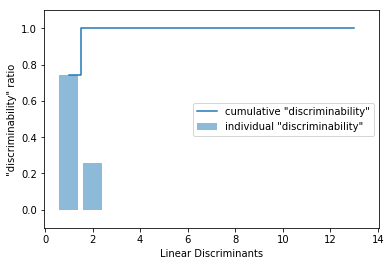

In [11]:
import matplotlib.pyplot as plt

tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center',
  label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
  label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

In [12]:
## Stack eigenvecotrs to create transofromation matrix

w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print 'Matrix W: \n', w

Matrix W: 
[[-0.0662 -0.3797]
 [ 0.0386 -0.2206]
 [-0.0217 -0.3816]
 [ 0.184   0.3018]
 [-0.0034  0.0141]
 [ 0.2326  0.0234]
 [-0.7747  0.1869]
 [-0.0811  0.0696]
 [ 0.0875  0.1796]
 [ 0.185  -0.284 ]
 [-0.066   0.2349]
 [-0.3805  0.073 ]
 [-0.3285 -0.5971]]


### Projecting into feature subspace

In [13]:
import numpy as np

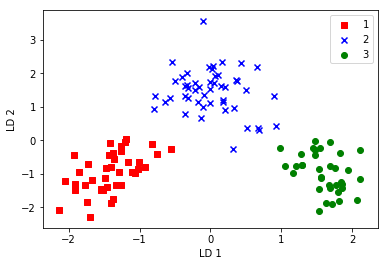

In [14]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l,0],
               X_train_lda[y_train==l, 1],
               c=c, label=l, marker = m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper right')
plt.show()

These classes are now linearly separable

#### LDA in SciKit Learn

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

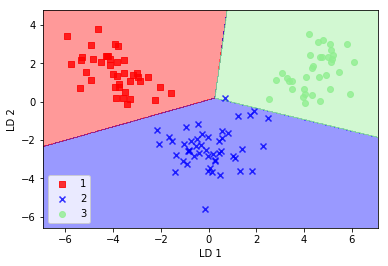

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

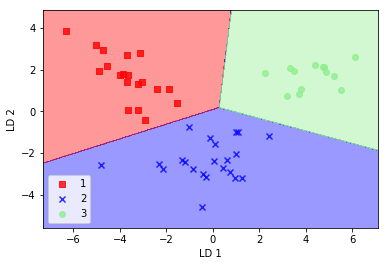

In [26]:
# on the test set

X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

### Using Kernel PCA for nonlinear mappings

In [4]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(C, gamma, n_components):
    """
    RBF Kernel PCA implementation.
    
    Parameters
    -----------
    X: (numPu ndarray), shape = [n_samples, n_features]
    gamma: float
        Tuning parameter of the RBF kernel
    n_components: int
    Number of principal components to return
    
    Returns 
    X_pc: (NumZPy ndarray), shape = [n_samples, k_features]
    projected dataset
    
    """
    
    #Calculate pairwise euclidean distance
    # in the M x N dataset
    sq_dists = pdist(X, 'sqeuclidean')
    
    # convert to square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # Compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    eigvals, eigvecs = eigh(K)
    
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components+1)))
    
    return X_pc
    

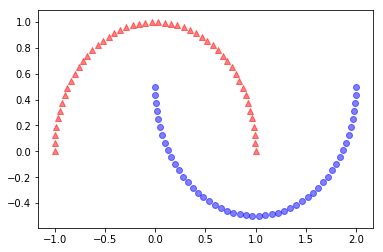

In [6]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y = make_moons(n_samples = 100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'blue', marker='o', alpha=0.5)
plt.show()

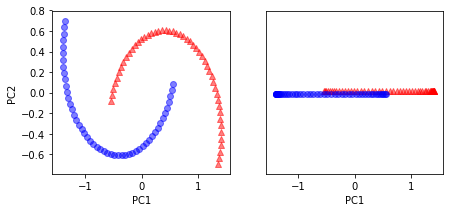

In [13]:
### Trying to use standard PCA to separate these two classes

from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
             color = 'red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,
             color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

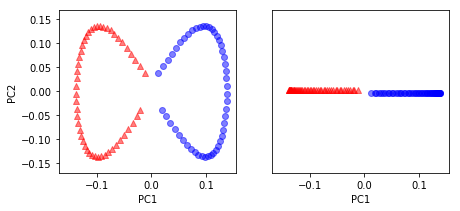

In [14]:
from matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X, gamma = 15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
             color = 'red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
             color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

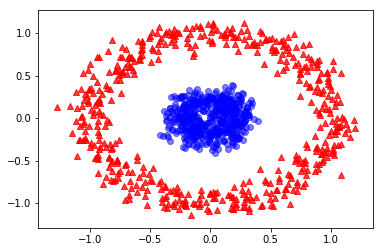

In [16]:
### Separating concentric circles
from sklearn.datasets import make_circles

X,y  = make_circles(n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.2)
plt.scatter(X[y==0, 0], X[y==0, 1],
           color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y==1,0], X[y==1,1], color = 'blue', marker = 'o', alpha = 0.5)
plt.show()


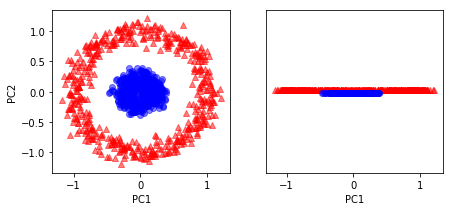

In [19]:
### standard PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
             color = 'red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02,
             color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

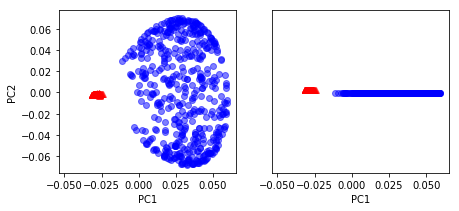

In [22]:
X_kpca = rbf_kernel_pca(X, gamma = 15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
             color = 'red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02,
             color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

In [ ]:
## Projecting new data points
## For kenel PCA need to use the training set each time we want to 
## project new samples. 

In [25]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    
    Parameters
    -----------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel
        
    n_components: int
        Number of principal components to return 
        
    Returns
    -----------
    X_pc: {numpy ndarray}, shape = [n_samples, k_features]
        Projected dataset
        
    lambdas: list
        Eigenvalues
    """

    #Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)
    
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)
    
    # Collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:, -i] for i in range(1,n_components+1)))
    
    # Collect the corresponding eigenvalues
    lambdas = [eigvals[-i] for i in range(1,n_components + 1)]
    
    return alphas, lambdas

    

In [26]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

In [27]:
x_new = X[25]
x_new

array([ 1.8713187 ,  0.00928245])

In [28]:
x_proj = alphas[25]
x_proj

array([ 0.07877284])

In [30]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas/lambdas)

In [31]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([ 0.07877284])

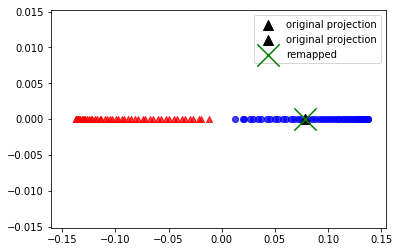

In [34]:
import matplotlib.pyplot as plt
plt.scatter(alphas[y==0,0], np.zeros((50)),
           color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), color = 'blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color = 'black', label = 'original projection', marker = '^', s=100)
plt.scatter(x_reproj, 0, color = 'green', label='remapped', marker='x', s = 500)
plt.legend(scatterpoints=1)
plt.show()

In [37]:
### Kernel PCA in scikit learn
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

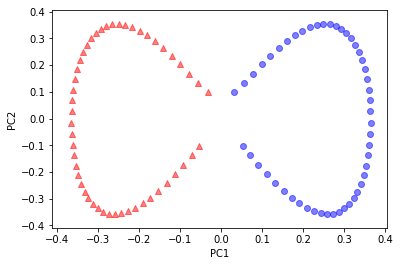

In [38]:
plt.scatter(X_skernpca[y==0,0], X_skernpca[y==0,1],
           color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1,1],
           color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()